<a href="https://colab.research.google.com/github/Madhumita1110/PySpark_ELT_pipeline/blob/main/A2_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

**What is K-means clustering?**

K-means clustering is an unsupervised algorithm. In an unsupervised algorithm, we are not interested in making predictions (since we don’t have a target/output variable). The objective is to discover interesting patterns in the data, e.g., are there any subgroups or ‘clusters’ among the bank’s customers?

Clustering techniques use raw data to form clusters based on common factors among various data points. Customer segmentation for targeted marketing is one of the most vital applications of the clustering algorithm.

**Dataset Description**

The Credit Card Dataset has been chosen from Kaggle repository of datasets. This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

**Hypothesis**

To do customer segmentation in the form of clusters based on pattern findings from the dataset.

In [ ]:
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['CC GENERAL.csv']))


Saving CC GENERAL.csv to CC GENERAL (2).csv


In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.isnull().sum() #check for null values

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df = df.dropna(subset=['CREDIT_LIMIT']) #drop row where credit_limit is null

In [ ]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(0) #replacing  null values in 'MINIMUM_PAYMENTS' with '0'

In [ ]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
df = df.drop(['CUST_ID'], axis=1)    #remove column 'CUST_ID' from dataframe because it won't help us in our hypothesis answering

Standardise the data before doing any further analysis.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features based on unit variance
X = StandardScaler().fit_transform(df)
X

In [ ]:
#convert X into a dataframe

X = pd.DataFrame(X, columns=[df.columns]) 
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297334,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088524,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357057,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.738015,0.517980,-0.333331,-0.356957,-0.132688,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.486266,-0.336129,1.183844,-4.126919
8945,-0.742488,0.517980,-0.329174,-0.356957,-0.122869,-0.466805,1.269742,-0.678716,1.179720,-0.675294,-0.476083,-0.350461,-0.960380,-0.503445,-0.357057,-0.525588,-4.126919
8946,-0.740463,-0.185895,-0.402000,-0.356957,-0.294930,-0.466805,0.854463,-0.678716,0.760359,-0.675294,-0.476083,-0.390691,-0.960380,-0.570660,-0.321774,0.329128,-4.126919
8947,-0.745239,-0.185895,-0.469584,-0.356957,-0.454607,-0.449373,-1.221928,-0.678716,-0.917090,0.157536,-0.183026,-0.591841,-1.097795,-0.580581,-0.333188,0.329128,-4.126919


In [ ]:
X.describe() #statistical information of each column

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03,8.949000e+03
mean,0.000000,-3.144205e-16,-8.257509e-17,-4.128754e-17,1.746781e-17,-1.587982e-17,7.701715e-17,-6.351930e-18,4.605149e-17,-1.270386e-17,1.587982e-17,1.905579e-17,2.159656e-16,6.351930e-17,-4.763947e-17,-3.175965e-18,-2.794849e-16
std,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-0.751704,-3.705263e+00,-4.695839e-01,-3.569565e-01,-4.546069e-01,-4.668054e-01,-1.221928e+00,-6.787162e-01,-9.170895e-01,-6.752945e-01,-4.760829e-01,-5.918405e-01,-1.221468e+00,-5.987332e-01,-3.570567e-01,-5.255884e-01,-4.126919e+00
25%,-0.690033,4.873144e-02,-4.509562e-01,-3.569565e-01,-4.546069e-01,-4.668054e-01,-1.014290e+00,-6.787162e-01,-9.170895e-01,-6.752945e-01,-4.760829e-01,-5.516107e-01,-7.954817e-01,-4.663388e-01,-2.872659e-01,-5.255884e-01,3.605413e-01
50%,-0.331962,5.179802e-01,-3.003952e-01,-3.340632e-01,-3.561912e-01,-4.668054e-01,2.390672e-02,-3.993831e-01,-4.977267e-01,-6.752945e-01,-4.760829e-01,-3.102316e-01,-4.107196e-01,-3.026846e-01,-2.330455e-01,-5.255884e-01,3.605413e-01
75%,0.235279,5.179802e-01,5.001060e-02,-8.840161e-03,6.362342e-02,6.432979e-02,1.062103e+00,3.268871e-01,9.700395e-01,4.351431e-01,1.100315e-01,9.206698e-02,5.511855e-01,5.801121e-02,-1.941521e-02,-3.717957e-02,3.605413e-01
max,8.397195,5.179802e-01,2.248248e+01,2.419985e+01,2.442576e+01,2.201002e+01,1.269742e+00,2.673295e+00,1.599083e+00,6.820167e+00,1.754694e+01,1.381045e+01,7.009692e+00,1.692160e+01,3.235145e+01,2.893277e+00,3.605413e-01


We should choose the optimal value of K that gives us best performance. Apply K-means clustering technique with initial 4 clusters. We are choosing this randomly.

In [ ]:
from sklearn.cluster import KMeans

clusters = 4
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 15)
model.fit(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=4, n_init=15)

In [ ]:
#store values of labels into a new column cluster_num

labels = model.labels_
X['cluster_num'] = labels
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_num
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297334,-0.525588,0.360541,0
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541,2
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088524,-0.525588,0.360541,3
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357057,-0.525588,0.360541,0
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541,0


**Centroid**

In K-means, each cluster is represented by its center (called a “centroid”), which corresponds to the arithmetic mean of data points assigned to the cluster. A centroid is a data point that represents the center of the cluster (the mean), and it might not necessarily be a member of the dataset. The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

In [ ]:
model.cluster_centers_

array([[-2.65030114e-01, -3.68336582e-01, -3.43083801e-01,
        -2.30399572e-01, -3.87729225e-01, -1.82059388e-01,
        -7.97617814e-01, -3.89292812e-01, -7.14129246e-01,
        -1.01202732e-01, -1.64529999e-01, -4.74853283e-01,
        -3.34244477e-01, -2.61833085e-01, -1.27761981e-01,
        -2.58909375e-01, -5.22478928e-02],
       [ 9.54377605e-01,  4.62565212e-01,  3.12565605e+00,
         2.71307916e+00,  2.40631217e+00, -1.55125368e-01,
         1.13623236e+00,  1.79852345e+00,  1.06580585e+00,
        -3.19060719e-01, -1.70486567e-01,  3.00307553e+00,
         1.42980173e+00,  1.91896053e+00,  4.86478571e-01,
         4.54625718e-01,  3.23968664e-01],
       [ 1.45945193e+00,  3.84478353e-01, -2.34696231e-01,
        -1.64057290e-01, -2.53618752e-01,  1.68922335e+00,
        -5.04745993e-01, -2.13086182e-01, -4.49909746e-01,
         1.74719746e+00,  1.61852961e+00, -2.83445258e-01,
         8.38701972e-01,  6.04737079e-01,  4.99349835e-01,
        -4.06310009e-01, -9.8

Plot clusters based on Credit_limit and purchases.

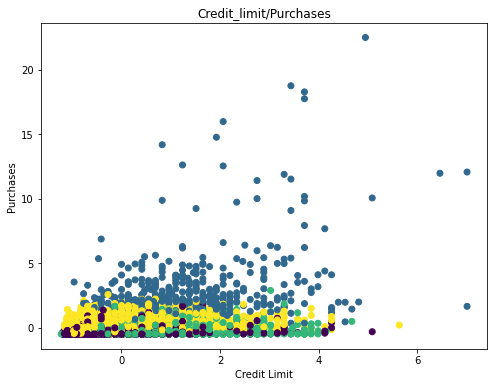

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X['CREDIT_LIMIT'], X['PURCHASES'], c=model.labels_.astype(float))
plt.title('Credit_limit/Purchases')
plt.xlabel('Credit Limit')
plt.ylabel('Purchases')
plt.show()

**Elbow Method to find K best clusters**

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) or inertia i.e. the sum of the square distance between points in a cluster and the cluster centroid.

The elbow method runs k-means clustering (kmeans number of clusters) on the dataset for a range of values of k (say 1 to 10).

Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points.

Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).

In [ ]:
#define features and target(no. of clusters)

X1 = X.drop(['cluster_num'], axis=1)
y = X['cluster_num']

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

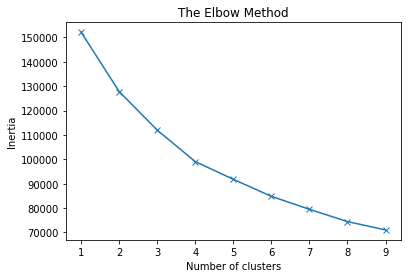

In [ ]:
#elbow method
inertia = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker ='x')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

By the above plot, we can see that there is a kink at k=3 or may be 4.

Hence k=3 or 4 can be considered a good number of clusters to segment the credit card customers.



**Silhouette Method to find K best clusters**

The Silhouette method is also a graphical representation of finding the optimal 'K' in a K-means clustering.The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

Select a range of values of k (say 1 to 10).
Plot Silhouette coefﬁcient for each value of K. The point at which the silhoutte score is maximised would be the ideal number of clusters to select for k-means.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

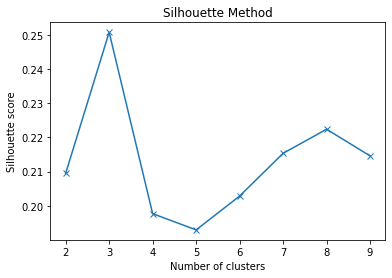

In [ ]:
#silhouette method

from sklearn.metrics import silhouette_score

sil_avg = []
K = range (2 ,10)
for k in K :
  kmeans = KMeans(n_clusters = k).fit(X1)
  labels = kmeans.labels_
  sil_avg.append(silhouette_score(X1, labels, metric ='euclidean'))

plt.plot(range(2, 10), sil_avg , marker ='x')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

See that the silhouette score is maximized at k = 3. So, we will take 3 clusters.

So, 3 clusters are the best to define our dataset based on both Elbow method and Silhouette Score method.

In [ ]:
y.dtypes 

cluster_num    int32
dtype: object

In [ ]:
y.astype(float) #convert datatype of target variable y (no. of clusters) to visualise clusters on XY plane

,cluster_num
0,0.0
1,2.0
2,3.0
3,0.0
4,0.0
...,...
8944,3.0
8945,3.0
8946,3.0
8947,0.0


Plot clusters on a 2D plane based on Credit_limit and purchases with k=3.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


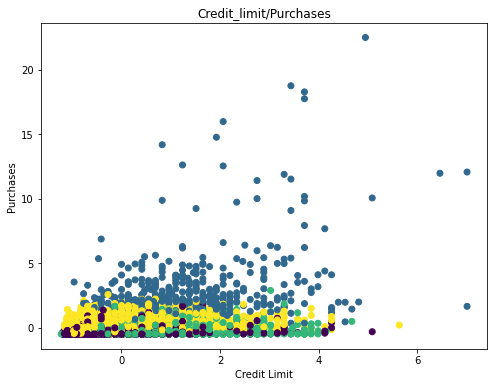

In [ ]:
clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 10)
model.fit(X1)

plt.figure(figsize=(8, 6))
plt.scatter(X1['CREDIT_LIMIT'], X1['PURCHASES'], c=y)
plt.title('Credit_limit/Purchases')
plt.xlabel('Credit Limit')
plt.ylabel('Purchases')
plt.show()

Plot clusters on a 3D plane based on Credit_limit, purchases and Balance with k=3.

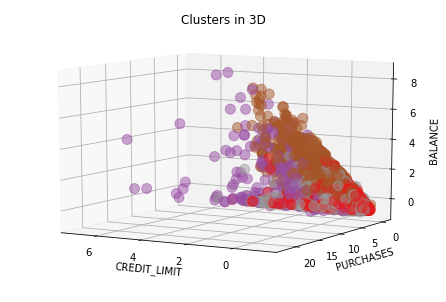

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure(1)
plt.clf()
ax = mplot3d.Axes3D(fig, rect=[0, 0, 1, 1], elev=10, azim=120)

plt.cla()
ax.scatter(X1['CREDIT_LIMIT'], X1['PURCHASES'], X1['BALANCE'],
           c = y, s = 100, cmap = 'Set1', 
           alpha = 0.5)
ax.set_title('Clusters in 3D')
ax.set_xlabel('CREDIT_LIMIT')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('BALANCE')
plt.show()